In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
boston_df=pd.read_csv('boston_housing.csv')

In [11]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [15]:
correlation_matrix = boston_df.corr()
print(correlation_matrix)

            Unnamed: 0      CRIM        ZN     INDUS      CHAS       NOX  \
Unnamed: 0    1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736   
CRIM          0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972   
ZN           -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604   
INDUS         0.399439  0.406583 -0.533828  1.000000  0.062938  0.763651   
CHAS         -0.003759 -0.055892 -0.042697  0.062938  1.000000  0.091203   
NOX           0.398736  0.420972 -0.516604  0.763651  0.091203  1.000000   
RM           -0.079971 -0.219247  0.311991 -0.391676  0.091251 -0.302188   
AGE           0.203784  0.352734 -0.569537  0.644779  0.086518  0.731470   
DIS          -0.302211 -0.379670  0.664408 -0.708027 -0.099176 -0.769230   
RAD           0.686002  0.625505 -0.311948  0.595129 -0.007368  0.611441   
TAX           0.666626  0.582764 -0.314563  0.720760 -0.035587  0.668023   
PTRATIO       0.291074  0.289946 -0.391679  0.383248 -0.121515  0.188933   
LSTAT       

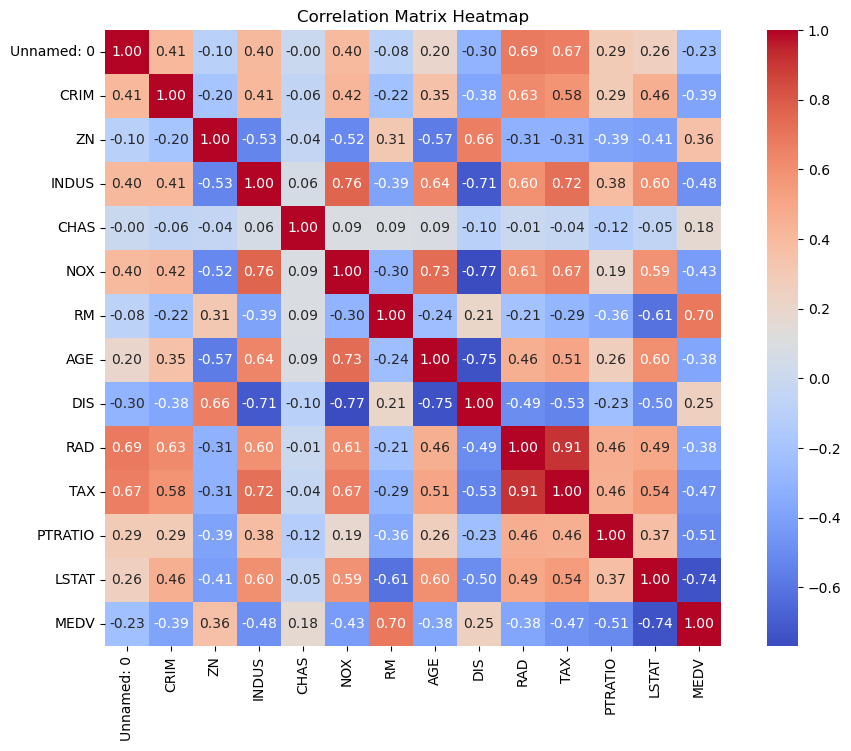

In [17]:
pyplot.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
pyplot.title('Correlation Matrix Heatmap')
pyplot.show()

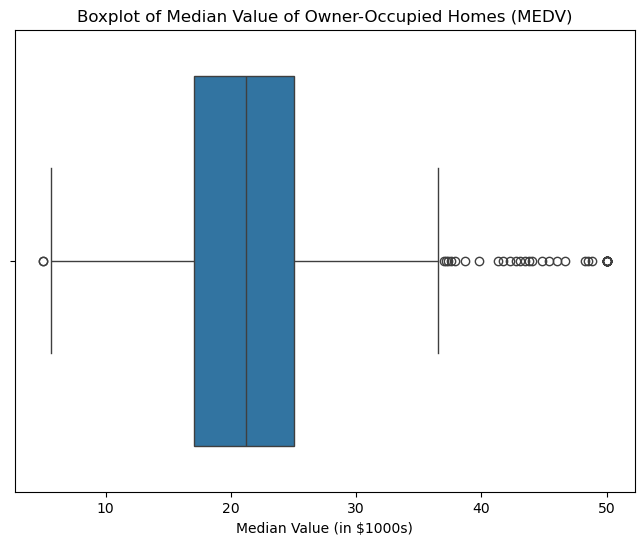

In [19]:
pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('Median Value (in $1000s)')
pyplot.show()


/var/folders/8d/_5c140cs4pxdnfvfc9sw_wfw0000gn/T/ipykernel_9811/1296918002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chas_counts.index, y=chas_counts.values, palette='viridis')


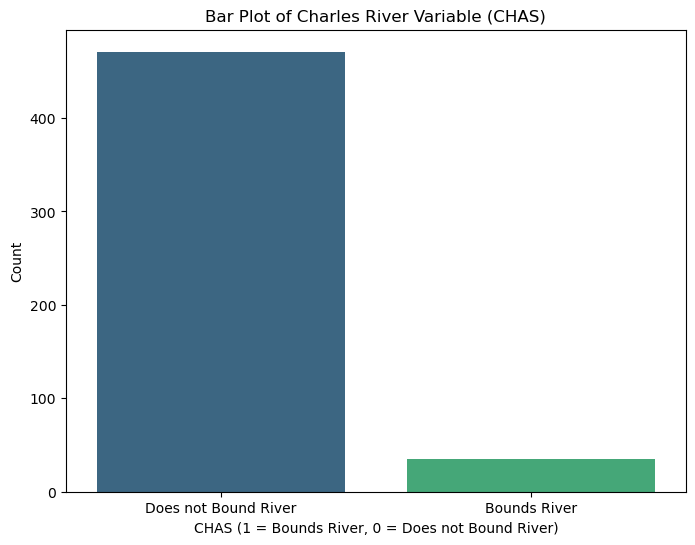

In [21]:
pyplot.figure(figsize=(8, 6))
chas_counts = boston_df['CHAS'].value_counts()
sns.barplot(x=chas_counts.index, y=chas_counts.values, palette='viridis')
pyplot.title('Bar Plot of Charles River Variable (CHAS)')
pyplot.xlabel('CHAS (1 = Bounds River, 0 = Does not Bound River)')
pyplot.ylabel('Count')
pyplot.xticks(ticks=[0, 1], labels=['Does not Bound River', 'Bounds River'])
pyplot.show()

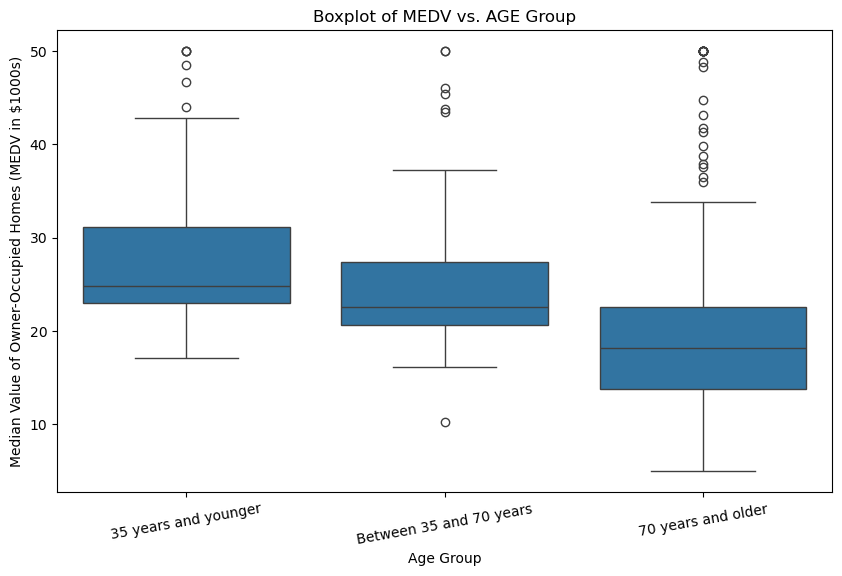

In [23]:
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs. AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes (MEDV in $1000s)')
pyplot.xticks(rotation=10)
pyplot.show()